In [1]:
import numpy as np
import sys

In [2]:
pathsource = '/home/milic/dat/MURaM_400G_plage_pore/'
path3D = pathsource + '3D/'
path2D = pathsource + '2D/'

In [3]:
header = np.loadtxt(path3D+'Header.024000')

nx = np.int64(header[0])
ny = np.int64(header[1])
nz = np.int64(header[2])
dx = np.float64(header[3])
dy = np.float64(header[4])
dz = np.float64(header[5])
time= np.float64(header[6])
delta_t = np.float64(header[7])
maxva= np.float64(header[8])

In [4]:
print(nx, ny, nz, dx, dy, dz, time, delta_t, maxva)

1056 1536 1536 651041.666667 651041.666667 651041.666667 495.183979 0.028394 25000000.0


In [5]:
nx = 1536 
ny = 1536
nz = 1056
Lx = 10e8
Ly = 10e8
Lz =  6.875e8

In [6]:
# To read the information on the time instances themselves, you read the time file:
time = np.fromfile(path2D+'Pore_10Mm_6x6km_res_Bz400G_time_012000_to_044450.dat',dtype=np.float64)
# the file contains the iteration number and simulation solar time [s]
nsnaps = time.size//2
time = time.reshape(2,nsnaps)
#print (nsnaps)
#print (time[1,:])

In [11]:
# Then we can read the timeseries of specific 2D slices, for instance, the horizontal velocity v_x at the photosphere (tau=1) is in the file:
# NOTE THAT I READ VY, because old MURaM notation is still here
# The ordering is, similarly to the most of the MURAM runs, z, x, y. THAT is, if you like your arrays to be indexed as x,y, which means
# you have to plot your images transposed.
# Here I assume that you call x is your variable that is contained in the outer loop i.e. slower index
vx_tau1 = np.memmap(path2D+'Pore_10Mm_6x6km_res_Bz400G_tau_1.000_vy_012000_to_044450.dat',dtype=np.float32,mode='r',shape=(nsnaps,nx,ny))
print(vx_tau1.shape)

(650, 1536, 1536)


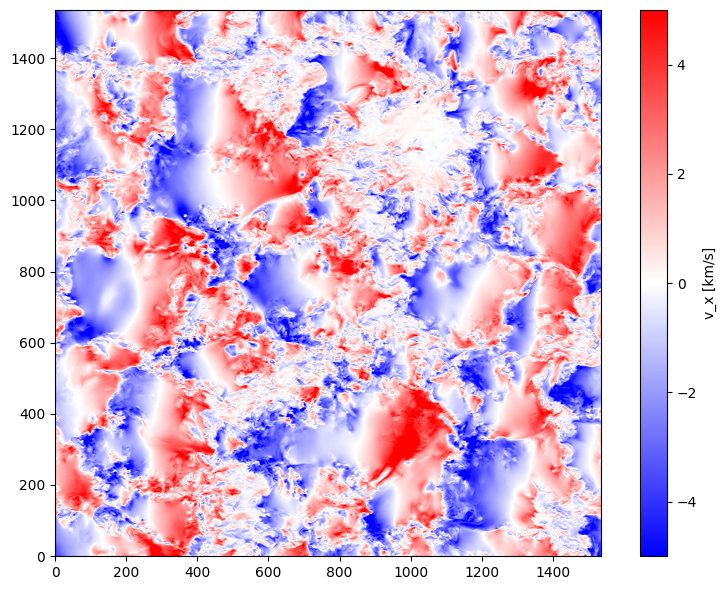

In [12]:
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize= (8.0,6.0))
plt.imshow(vx_tau1[10,:,:].T/1E5,cmap='bwr',vmin=-5,vmax=5,origin='lower')
plt.tight_layout()
plt.colorbar(label='v_x [km/s]')    
plt.savefig('vx_tau1.png',dpi=150)

In [14]:
Bx_tau1 = np.memmap(path2D+'Pore_10Mm_6x6km_res_Bz400G_tau_1.000_by_012000_to_044450.dat',dtype=np.float32,mode='r',shape=(nsnaps,nx,ny))
print(Bx_tau1.shape)

(650, 1536, 1536)


In [18]:
# Magnetic field in muram comes in units of np.sqrt(4.0*pi) so :
Bunit = np.sqrt(4.0*np.pi)

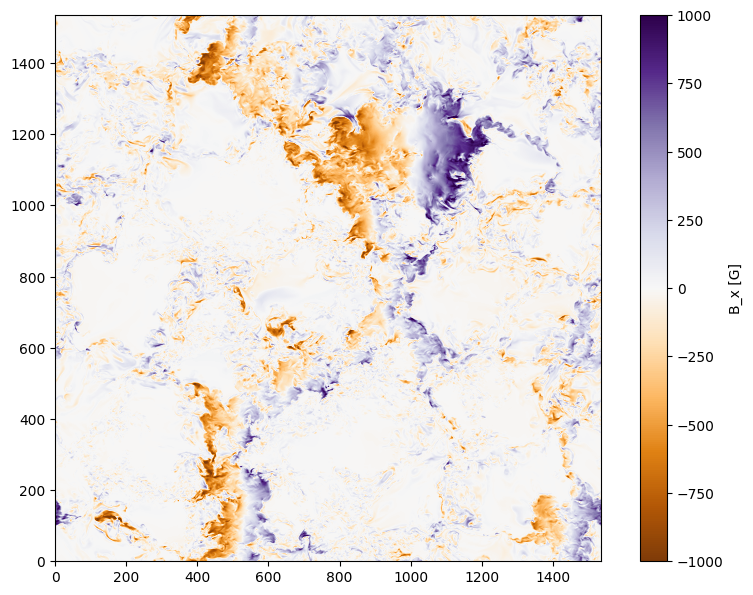

In [19]:
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize= (8.0,6.0))
plt.imshow(Bx_tau1[10,:,:].T*Bunit,cmap='PuOr',vmin=-1000,vmax=1000,origin='lower')
plt.tight_layout()
plt.colorbar(label='B_x [G]')    
plt.savefig('bx_tau1.png',dpi=150)

In [20]:
Bz_tau1 = np.memmap(path2D+'Pore_10Mm_6x6km_res_Bz400G_tau_1.000_bx_012000_to_044450.dat',dtype=np.float32,mode='r',shape=(nsnaps,nx,ny))
print(Bz_tau1.shape)

(650, 1536, 1536)


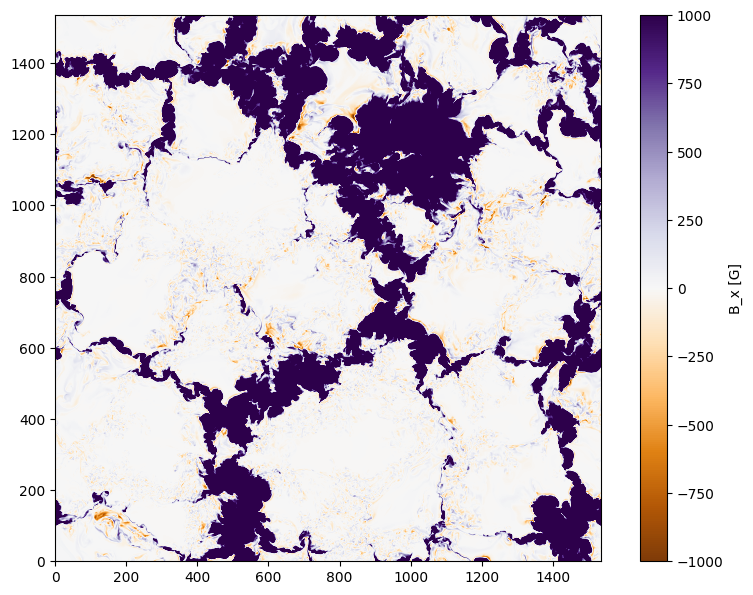

In [21]:
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize= (8.0,6.0))
plt.imshow(Bz_tau1[10,:,:].T*Bunit,cmap='PuOr',vmin=-1000,vmax=1000,origin='lower')
plt.tight_layout()
plt.colorbar(label='B_x [G]')    
plt.savefig('bx_tau1.png',dpi=150)